In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df['BloodPressure'].min()

0

In [20]:
# it appears that some women have a blood pressure of 0 which is obviusly impossible  therefore it must be a null
# lets get rid of them

In [21]:
blood_pressure_exist = df[df['BloodPressure']!=0]
blood_pressure_exist =blood_pressure_exist['BloodPressure']
blood_pressure_exist

0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 733, dtype: int64

In [22]:
# I looked it up and diastolic pressure(what we have) above 80 is considered high blood pressure
# so lets make a column of high blood pressure.

In [23]:
df['High_BloodPressure']=df['BloodPressure'].apply(lambda x:1 if x>=80 else 0)
df['High_BloodPressure'].value_counts()


0    563
1    205
Name: High_BloodPressure, dtype: int64

In [24]:
# Lets get rid of bmi =0 cuz thats obviously null

In [25]:
bmi_noNull=df[df['BMI']!=0]
bmi_noNull['BMI'].median()
df['BMI']=df['BMI'].apply(lambda x:bmi_noNull['BMI'].median() if x==0 else x)
df['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [26]:
# I also found that a bmi between 25-30(not including 30) is overweight and 30+ is obese and under 18.5 is underweight so lets
# make a column.

In [27]:
def find_weight(position):
    if position<18.5:
        return 'UnderWeight'
    elif position>=18.5 and position<30:
        return 'Healthy'
    else :
        return 'Obese'
    

In [28]:
df['Weight']=df['BMI'].apply(find_weight)
df['Weight'].value_counts()

Obese          483
Healthy        281
UnderWeight      4
Name: Weight, dtype: int64

In [29]:
# Medicly anyone age 65 and above is considered elderly so lets make another column

In [30]:
df['Elderly']=df['Age'].apply(lambda x:1 if x>=65 else 0)
df['Elderly'].value_counts()

0    752
1     16
Name: Elderly, dtype: int64

In [31]:
#Normal blood glucose level (tested while fasting) for non-diabetics is between 3.9 and 7.1 mmol/L (70 and 130 mg/dL)

<AxesSubplot:>

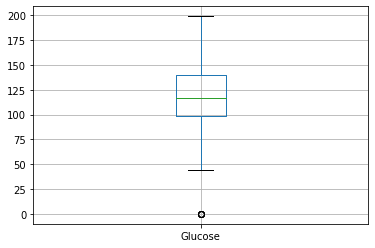

In [32]:
# as we can see besides the zeros there are no outliers so lets put the mean for zeros
glucose_no_zero=df[df['Glucose']!=0]
df.boxplot(column=['Glucose'])

In [33]:
df['Glucose']=df['Glucose'].apply(lambda x:int(glucose_no_zero['Glucose'].mean()) if x==0 else x)

In [34]:
def define_glucose_level(position):
    if position<70:
        return 'low_glucose_levels'
    elif position>=130:
        return 'high_glucose_levels'
    else:
        return 'normal_glucose_levels'
    

In [35]:
df['Glucose_Level']=df['Glucose'].apply(define_glucose_level)
df['Glucose_Level'].value_counts()

normal_glucose_levels    499
high_glucose_levels      258
low_glucose_levels        11
Name: Glucose_Level, dtype: int64

In [36]:
AllZero=df['Insulin']==0
AllZero.value_counts()

False    394
True     374
Name: Insulin, dtype: int64

In [37]:
#skin thickness level of 0 is impossible therfore lets check what we should change it with


0    32
dtype: int64


<AxesSubplot:>

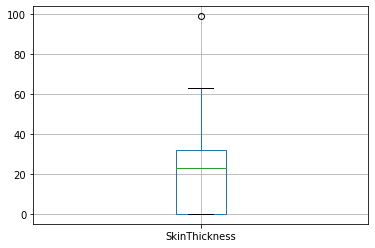

In [38]:

skin_thickness_without=df[df['SkinThickness']!=0]
skin_thickness_withonly=df[df['SkinThickness']==0]
print(skin_thickness_without['SkinThickness'].mode())
df.boxplot(column=['SkinThickness'])

In [39]:
#as you can see the boxplot shows an overwhelming amount of zeros so lets change them with the mode

In [40]:
df['SkinThickness']=df['SkinThickness'].apply(lambda x:32 if x==0 else x)
df['SkinThickness']

0      35
1      29
2      32
3      23
4      35
       ..
763    48
764    27
765    23
766    32
767    31
Name: SkinThickness, Length: 768, dtype: int64

In [41]:
def thickness_level(position):
    if position<=10:
        return 1
    elif position<=20:
        return 2
    elif position<=30:
        return 3
    elif position<=40:
        return 4
    elif position<=50:
        return 5
    elif position<=60:
        return 6
    elif position<=70:
        return 7
    elif position<=80:
        return 8
    elif position<=90:
        return 9
    else:
        return 10

In [42]:
df['Thickness_level']=df['SkinThickness'].apply(thickness_level)
df['Thickness_level'].value_counts()

4     391
3     179
2     115
5      65
1       9
6       7
7       1
10      1
Name: Thickness_level, dtype: int64

In [43]:
# lets look at insulin

<AxesSubplot:>

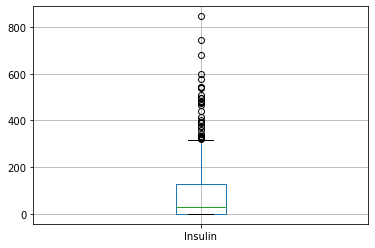

In [44]:
insulin_zero=df[df['Insulin']==0]
df.boxplot(column=['Insulin'])

In [45]:
#as we can see there are an increbdible amount of outliers so lets choose to change insulin to the median
#so they are in the concintrated area

In [46]:
insulin_without_zero=df[df['Insulin']!=0]
insulin_without_zero['Insulin'].median()
df['Insulin']=df['Insulin'].apply(lambda x:insulin_without_zero['Insulin'].median() if x==0 else x)
df['Insulin']

0      125.0
1      125.0
2      125.0
3       94.0
4      168.0
       ...  
763    180.0
764    125.0
765    112.0
766    125.0
767    125.0
Name: Insulin, Length: 768, dtype: float64

In [47]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,High_BloodPressure,Weight,Elderly,Glucose_Level,Thickness_level
0,6,148,72,35,125.0,33.6,0.627,50,1,0,Obese,0,high_glucose_levels,4
1,1,85,66,29,125.0,26.6,0.351,31,0,0,Healthy,0,normal_glucose_levels,3
2,8,183,64,32,125.0,23.3,0.672,32,1,0,Healthy,0,high_glucose_levels,4
3,1,89,66,23,94.0,28.1,0.167,21,0,0,Healthy,0,normal_glucose_levels,3
4,0,137,40,35,168.0,43.1,2.288,33,1,0,Obese,0,high_glucose_levels,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0,0,Obese,0,normal_glucose_levels,5
764,2,122,70,27,125.0,36.8,0.340,27,0,0,Obese,0,normal_glucose_levels,3
765,5,121,72,23,112.0,26.2,0.245,30,0,0,Healthy,0,normal_glucose_levels,3
766,1,126,60,32,125.0,30.1,0.349,47,1,0,Obese,0,normal_glucose_levels,4


In [48]:
df.to_csv('Cleaned_Diabetes.csv')